In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_etfs(100)], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-25 to 2019-06-04'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
SPLV,49,1.476678,0.945659,1.378768,1.971361
FINX,49,2.003738,2.486934,0.736210,5.312173
XLU,49,0.856701,1.629206,0.419755,3.426052
VIG,49,1.086929,2.449655,0.373153,4.634193
ICLN,49,1.089174,2.537992,0.361049,4.109590
VOOG,49,1.206908,3.034131,0.340814,6.391444
SPYG,49,1.196746,3.011017,0.340055,6.359873
XLF,49,1.183871,4.248203,0.237992,7.338794
ITA,49,0.967758,3.370900,0.235820,6.965175


In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 1)

['SPLV'] -0.8859276073669002 0.0 0.49284013923112413 -1.3787677465980244


['SPLV']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['SPLV'])

['SPLV', 'FINX'] 1.0128016832858462 1.3068956263123703 1.8208834475592637 -2.114977390585788
['SPLV', 'XLU'] 0.6981730254680487 1.1473427852786333 1.3493532367252379 -1.7985229965358225
['SPLV', 'ICLN'] 0.3591480835136045 0.5787276969230084 1.5202375592902166 -1.7398171726996206


['SPLV', 'ICLN']

In [7]:
quote.setup_mask(['SPLV', 'ICLN'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 SPLV    0.967996
 ICLN    0.032004
 dtype: float64, 1.4643, 0.9421)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
SPLV,49.0,1.476678,0.945659,-0.950248,0.806854,1.729277,2.085358,3.297558,1.378768,1.971361
Portfolio,49.0,1.464448,0.941671,-0.957087,0.806486,1.788365,2.005003,3.382306,1.371620,1.959614
ICLN,49.0,1.089174,2.537992,-2.859960,-1.181101,0.801612,2.746698,6.210528,0.361049,4.109590


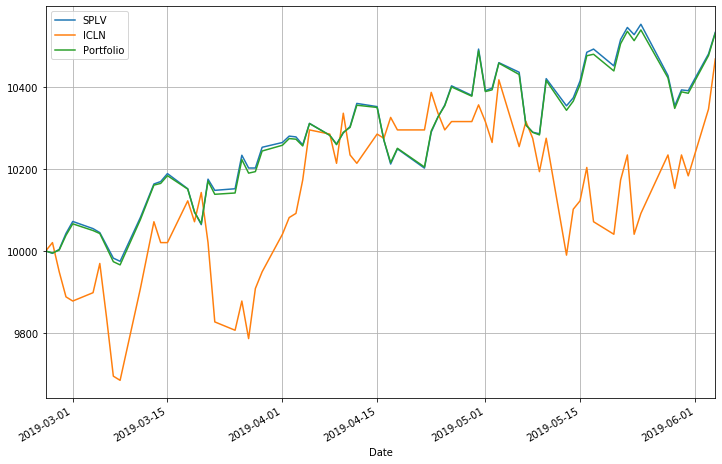

In [8]:
quote.graph(21, {'SPLV': .97, 'ICLN': .03})